# Perceptron

In this notebook I will create a simple perceptron from scratch in order to get better acquainted with the concept and the math behind it.

## Dataset
This is a simple dataset that I will use to train my perceptron. It consists of two straight lines in two dimensions, belonging each to their respective classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Create the vector
vector = np.array([[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]])

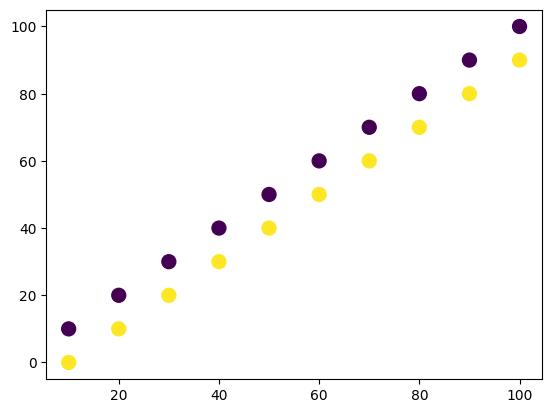

In [81]:
# Visualize it
plt.scatter(
    x = vector[0].T,
    y = vector[1].T,
    c = vector[2],
    s = 100
)

In [82]:
# Separate inputs and outputs
training_data = np.array([vector[0], vector[1]]).T
labels = np.array(vector[2]==1).astype(int)

## Perceptron

This is the body of the perceptron.

In [83]:
# Create the perceptron class
class Perceptron():
  def __init__(self, input_size, learning_rate = 0.1, epochs = 1000):
    self.input_size = input_size
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = np.ones(input_size + 1)

  def train(self, training_data, labels):
    for epoch in range(self.epochs):
      total_error = 0
      for input, label in zip(training_data, labels):
        prediction = self.predict(input)
        error = label - prediction
        total_error += abs(error)

        self.weights[1:] += self.learning_rate * error * input
        self.weights[0] += self.learning_rate * error

      if total_error == 0:
        print(f'Converged after {epoch + 1} epochs')
        return f'Final weights: {self.weights}'

    print('No separation hyperplane could be found in the specified number of epochs')

  def predict(self, inputs):
    input_with_bias = np.insert(inputs, 0, 1)
    weighted_sum = np.dot(input_with_bias, self.weights)
    return self.activation(weighted_sum)

  def activation(self, weighted_sum):
    return 1 if weighted_sum >= 0 else 0

In [84]:
# Try it out
perceptron = Perceptron(input_size = 2)
perceptron.train(training_data, labels)

Converged after 15 epochs


'Final weights: [-0.1  9.  -9. ]'

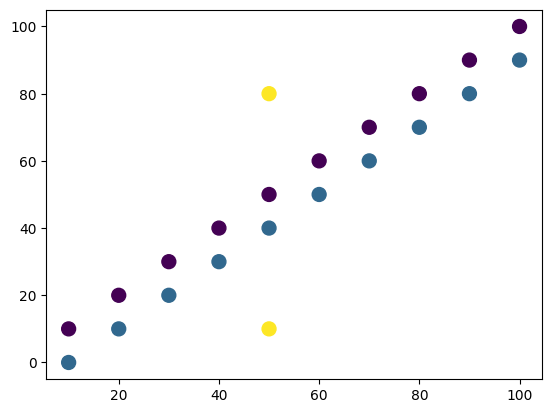

In [92]:
# We create points that belong to classes 0 and 1, respectively
punto_0 = np.array([50, 80])
punto_1 = np.array([50, 10])

# Visualize alongside the dataset
plt.scatter(
    x = np.append(vector[0], [punto_0[0], punto_1[0]]),
    y = np.append(vector[1], [punto_0[1], punto_1[1]]),
    c = np.append(vector[2], [3, 3]),
    s = 100
)

In [94]:
# Predict the classes
pred_0 = perceptron.predict(punto_0)
pred_1 = perceptron.predict(punto_1)
pred_0, pred_1

(0, 1)

### Find the equation of the hyperplane
In the form of:

$$w_0 + \frac{w_1}{x_1} + \frac{w_2}{x_2} = 0$$

Or, solving for $$x_2$$

We get

$$x_2 = -\frac{w_0}{w_2} - \frac{w_1x_1}{w_2}$$


In [97]:
# Finding the hyperplane based on the weights
w = perceptron.weights

# Ranging x to graph the hyperplane
x_range = np.linspace(min(vector[0]) - 10, max(vector[0]) + 10, 100)

# Calculate y for the hyperplane
if w[2] != 0:  # Avoid dividing by zero
    y_range = -(w[0] / w[2]) - (w[1] / w[2]) * x_range
else:
    print("El modelo no puede calcular un hiperplano (w[2] = 0)")
    y_range = np.zeros_like(x_range)

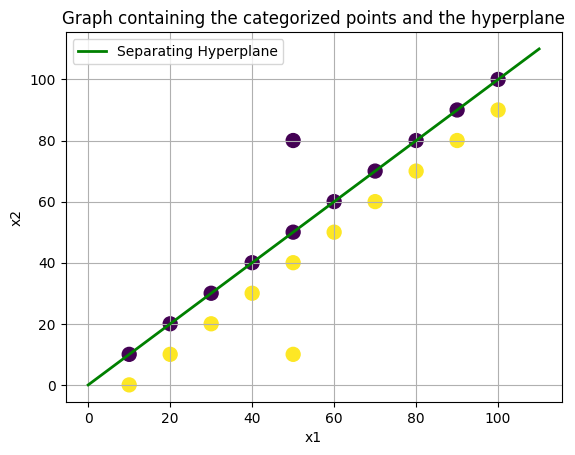

In [98]:
# Visualize hyperplane with assigned classes
plt.scatter(
    x = np.append(vector[0], [punto_0[0], punto_1[0]]),
    y = np.append(vector[1], [punto_0[1], punto_1[1]]),
    c = np.append(vector[2], [pred_0, pred_1]),
    s = 100
)

# Graficar el hiperplano
plt.plot(x_range, y_range, label="Calculated Hyperplane", color="green", linewidth=2)

# Etiquetas y leyenda
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Graph containing the categorized points and the hyperplane")
plt.legend()
plt.grid(True)
plt.show()
